### Import


In [1]:
#!pip install seaborn

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
df = pd.read_csv("recommendation.attractions.csv", encoding='utf-8')
category_cols = ['nature', 'animal', 'architect', 'history', 'culture', 'hiking', 'park', 'museum', 'religion', 'amusement', 'senic', 'botanical', 'sport']
attracion_cities = df['city']
binary_vectors = df[category_cols].values
attraction_ids = df['_id']

### Calculate silhouette score

Best K: 69, Silhouette Score: 0.9280681596826682


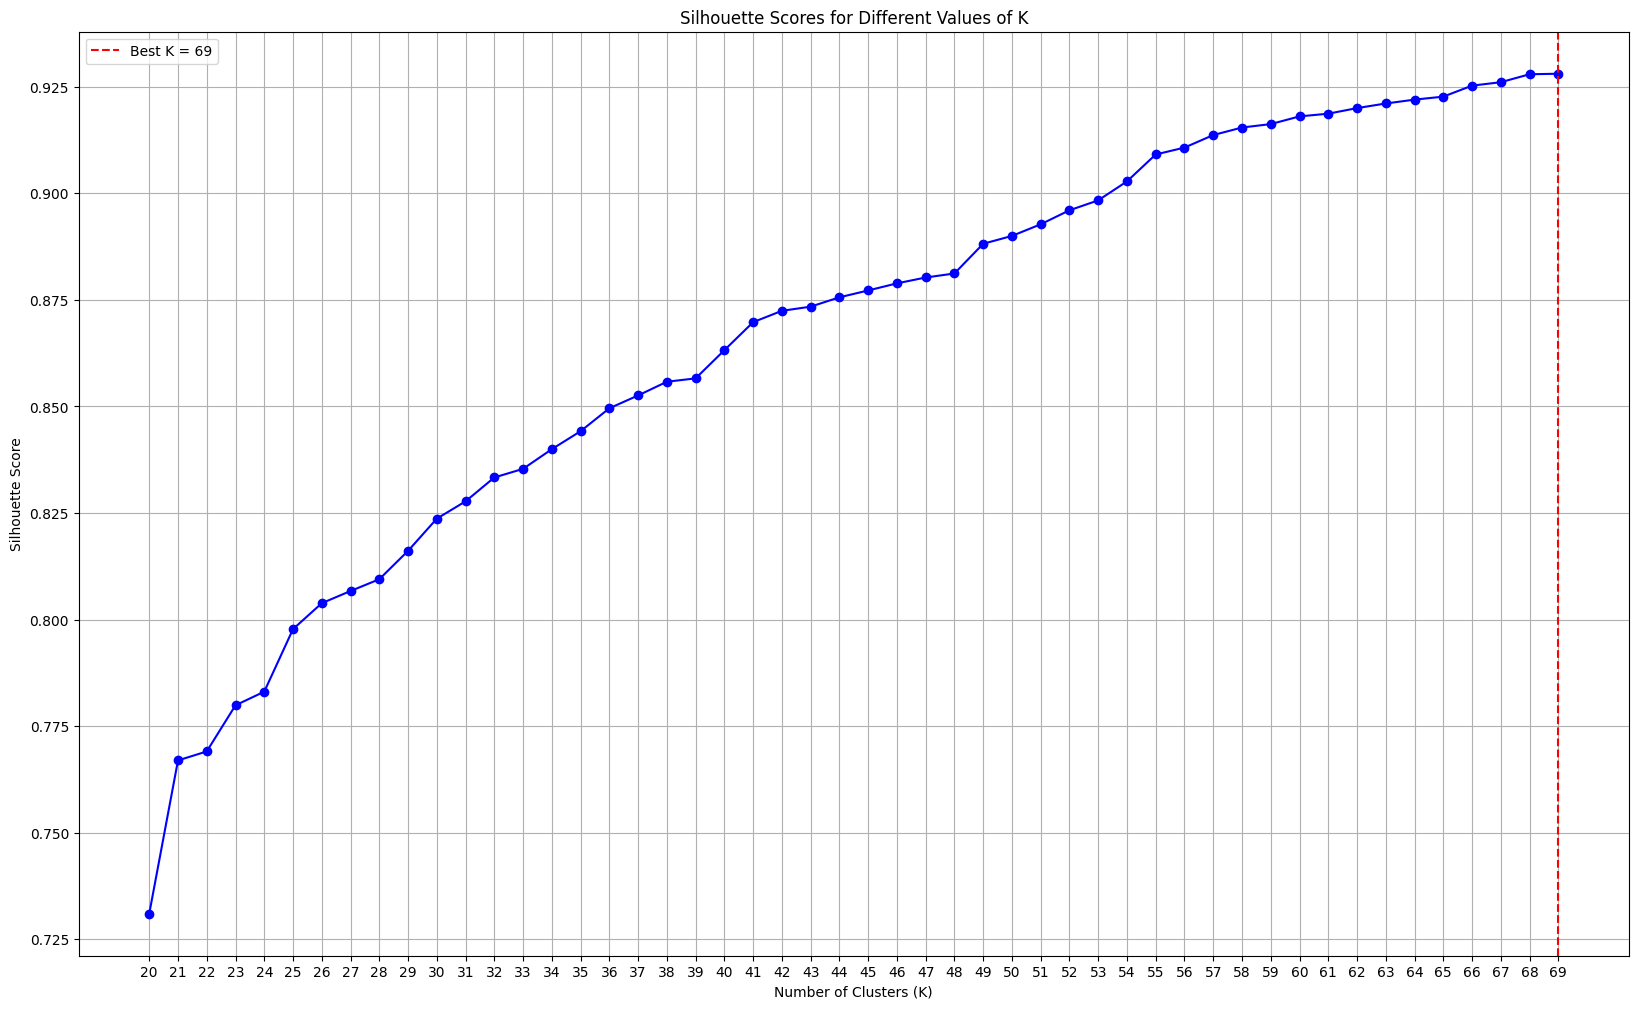

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Initialize list to store silhouette scores
silhouette_scores = []

# Compute silhouette scores for different values of k
for k in range(20,70):  # Try different k values (10 to 29 clusters)
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(binary_vectors)
    score = silhouette_score(binary_vectors, cluster_labels)
    silhouette_scores.append(score)

# Determine the best k
best_k = silhouette_scores.index(max(silhouette_scores)) + 20  # Offset by starting k
print(f"Best K: {best_k}, Silhouette Score: {max(silhouette_scores)}")

# Visualize the silhouette scores
plt.figure(figsize=(20, 12))
plt.plot(range(20, 70), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Scores for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(20, 70))
plt.grid(True)
plt.axvline(best_k, color='r', linestyle='--', label=f'Best K = {best_k}')
plt.legend()
plt.show()


### Compute pairwise Jaccard similarity

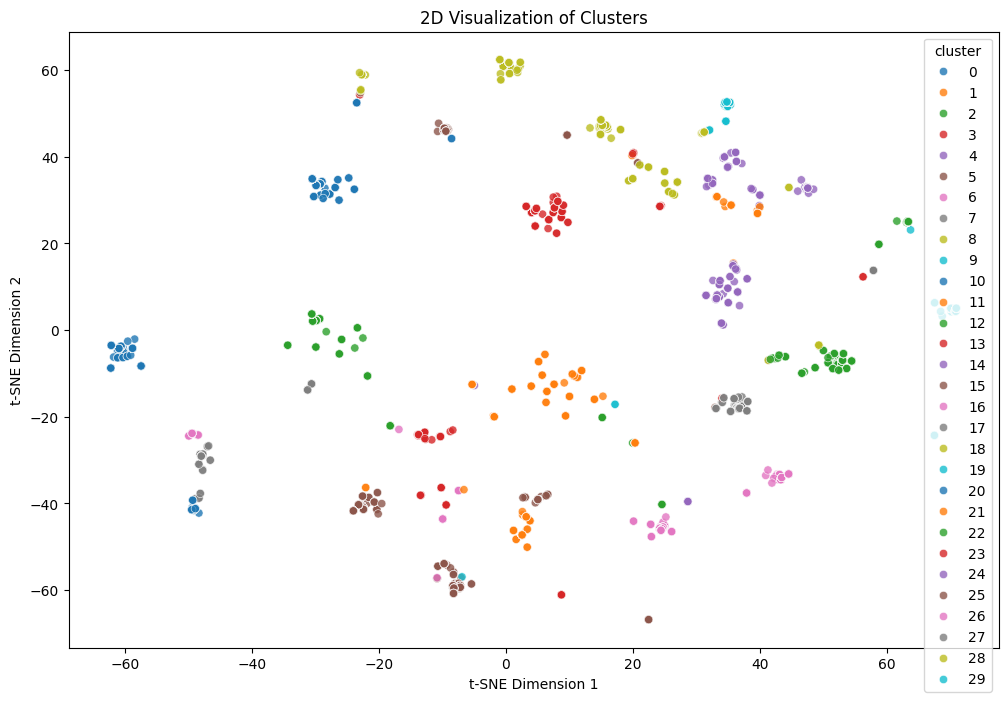

In [20]:
num_clusters = 30
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(binary_vectors)

# Dimensionality Reduction with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
binary_vectors_2d = tsne.fit_transform(binary_vectors)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=binary_vectors_2d[:, 0], 
    y=binary_vectors_2d[:, 1], 
    hue=df['cluster'], 
    palette='tab10',  
    alpha=0.8
)
plt.title("2D Visualization of Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

### Get 5 most similar attractions for each attraction

In [21]:
grouped = df.groupby(['cluster'])['_id'].apply(list).reset_index()
grouped.columns = ['cluster', '_ids']
grouped_city_dict = {}
for ids in grouped['_ids']:
    filtered_df = df[df['_id'].isin(ids)]
    city_dict = {}
    residual = []
    # find all ids in same city
    for index, row in filtered_df.iterrows():
        city = row['city']
        id = row['_id']
        if city in city_dict:
            city_dict[city].append(id)
        else:
            city_dict[city] = [id]
    for c, i in city_dict.items():
        if len(i) > 1:
            grouped_city_dict[len(grouped_city_dict)] = i
        else:
            residual.extend(i)
    if residual:
        grouped_city_dict[len(grouped_city_dict)] = residual

print(grouped_city_dict)

{0: ['676b0d3449a89bca4c4a753e', '676b0d3449a89bca4c4a7543', '676b0d3449a89bca4c4a754c', '676b0d3649a89bca4c4a9235'], 1: ['676b0d3449a89bca4c4a7579', '676b0d3449a89bca4c4a757a'], 2: ['676b0d3449a89bca4c4a75b0', '676b0d3449a89bca4c4a75b5'], 3: ['676b0d3449a89bca4c4a75cc', '676b0d3449a89bca4c4a75d2', '676b0d3549a89bca4c4a7a5a'], 4: ['676b0d3449a89bca4c4a7620', '676b0d3549a89bca4c4a7cc5'], 5: ['676b0d3449a89bca4c4a763d', '676b0d3449a89bca4c4a7641'], 6: ['676b0d3449a89bca4c4a766f', '676b0d3449a89bca4c4a7675'], 7: ['676b0d3449a89bca4c4a7699', '676b0d3649a89bca4c4a8884'], 8: ['676b0d3449a89bca4c4a76a1', '676b0d3549a89bca4c4a8350', '676b0d3549a89bca4c4a8352', '676b0d3549a89bca4c4a8354', '676b0d3549a89bca4c4a835c', '676b0d3549a89bca4c4a835d', '676b0d3549a89bca4c4a835e', '676b0d3649a89bca4c4a8f8f', '676b0d3649a89bca4c4a8f91', '676b0d3649a89bca4c4a8f95', '676b0d3649a89bca4c4a8f9c', '676b0d3649a89bca4c4a9032', '676b0d3649a89bca4c4a90d1'], 9: ['676b0d3449a89bca4c4a76be', '676b0d3449a89bca4c4a76cd'

### Save Results

In [22]:
df_group_city = pd.DataFrame({
    'cluster': list(grouped_city_dict.keys()),
    '_ids': list(grouped_city_dict.values())
})
df_group_city.to_csv('grouped_clustered_city_attractions.csv', index=False)